In [374]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [375]:
# Leer csv
df_tiendas = pd.read_csv('/content/drive/MyDrive/2024/2do Cuatri - 2024/Proyecto Final/TP Proyecto/Entrega 3/Codigo E3/tiendas_caba_v6.csv')

In [376]:
# Recorrer cada columna y verificar si tiene valores nulos
for col in df_tiendas.columns:
    nulos = df_tiendas[col].isnull().sum()
    if nulos > 0:
        print(f"Columna: {col}, Cantidad de nulos: {nulos}")

Columna: porc_nbi, Cantidad de nulos: 1
Columna: hacinamiento, Cantidad de nulos: 1
Columna: porc_mujeres, Cantidad de nulos: 1
Columna: porc_varones, Cantidad de nulos: 1


In [377]:
df_tiendas = df_tiendas.dropna()

In [378]:
print(df_tiendas.describe())

       estaciones_servicio_200mts  estaciones_servicio_1000mts  subtes_200mts  \
count                 1982.000000                  1982.000000    1982.000000   
mean                     0.141776                     3.014127       0.097881   
std                      0.372693                     1.806042       0.332499   
min                      0.000000                     0.000000       0.000000   
25%                      0.000000                     2.000000       0.000000   
50%                      0.000000                     3.000000       0.000000   
75%                      0.000000                     4.000000       0.000000   
max                      3.000000                     9.000000       3.000000   

       subtes_1000mts     porc_nbi  hacinamiento  porc_mujeres  porc_varones  \
count      1982.00000  1982.000000   1982.000000   1982.000000   1982.000000   
mean          1.78557     0.052517      2.461014      0.543766      0.456234   
std           2.27333     0.07

# **Estandarización**

In [379]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Lista de columnas a escalar
columnas_a_escalar = [
    'estaciones_servicio_200mts', 'estaciones_servicio_1000mts',
    'subtes_200mts', 'subtes_1000mts', 'hacinamiento',
    'uni_privada_200mts', 'uni_publica_200mts',
    'uni_privada_1000mts', 'uni_publica_1000mts',
    'estadios_200mts', 'estadios_1000mts',
    'river_1500mts', 'boca_1500mts',
    'clubes_200mts', 'clubes_1000mts',
    'tienda_mas_cercana', 'escuelas_cercanas_200m',
    'escuelas_cercanas_1000m', 'paradas_cercanas_200m',
    'paradas_cercanas_1000m', 'everdes_cercanos_200m',
    'everdes_cercanos_1000m', 'hospitales_cercanos_200m',
    'hospitales_cercanos_1000m', 'distancia_al_hospital_mas_cercano',
    'parroquias_cercanas_200m', 'parroquias_cercanas_1000m',
    'negocios_cercanos_200m', 'negocios_cercanos_1000m',
    'tiendas_cercanas_200m', 'supermercados_200m',
    'supermercados_1000m', 'hipermercado_200m',
    'hipermercado_1000m', 'autoservicio_200m',
    'autoservicio_1000m', 'negocios_24hs_cercanos_1000m',
    'negocios_findesemana_200m', 'pob',
    'producto_1_freq', 'producto_2_freq',
    'producto_3_freq', 'producto_4_freq',
    'producto_5_freq', 'categoria_1_freq',
    'categoria_2_freq', 'categoria_3_freq',
    'categoria_4_freq', 'categoria_5_freq',
    'comuna_freq'
]

# Crear un scaler
scaler = StandardScaler()

# Estandarizar las columnas seleccionadas
df_tiendas[columnas_a_escalar] = scaler.fit_transform(df_tiendas[columnas_a_escalar])

# Verifica los primeros datos escalados en el DataFrame
print(df_tiendas.head())

   estaciones_servicio_200mts  estaciones_servicio_1000mts  subtes_200mts  \
0                   -0.380506                    -0.007824      -0.294454   
1                   -0.380506                    -0.561661      -0.294454   
2                   -0.380506                    -1.115497      -0.294454   
3                   -0.380506                     1.099849      -0.294454   
4                   -0.380506                     1.099849      -0.294454   

   subtes_1000mts  porc_nbi  hacinamiento  porc_mujeres  porc_varones  \
0       -0.785641  0.138810      1.001735      0.494970      0.505030   
1        0.094348  0.007092     -0.020082      0.553468      0.446532   
2       -0.345646  0.085714     -1.150206      0.553043      0.446957   
3       -0.785641  0.038147      0.452352      0.556133      0.443867   
4        0.974337  0.048780     -1.060450      0.508772      0.491228   

   uni_privada_200mts  uni_publica_200mts  ...  producto_2_freq  \
0           -0.197211          

# **PCA**

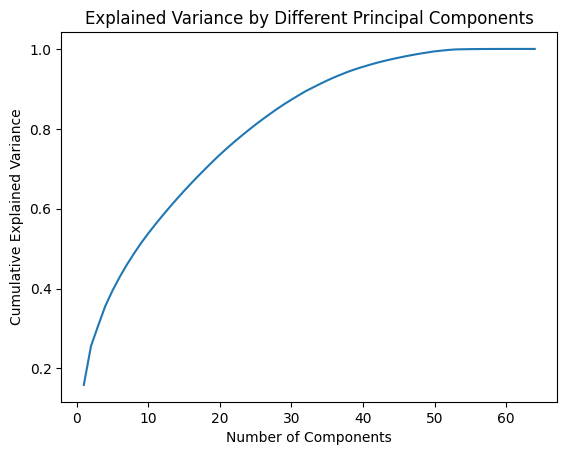

In [380]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA on scaled data
pca = PCA().fit(df_tiendas)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.show()

In [381]:
from sklearn.decomposition import PCA

# Applying PCA with the optimal number of components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_tiendas)

In [382]:
# Multiplicar cada componente por su varianza explicada
pca_result = pca_result * pca.explained_variance_ratio_

# **BIRCH**

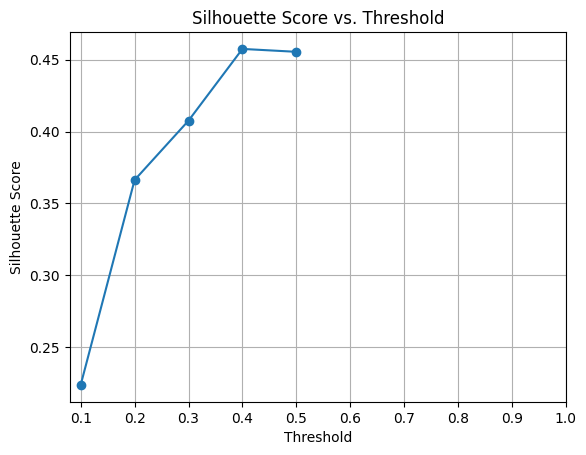

In [383]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Lista de thresholds a probar
thresholds = np.arange(0.1, 1.1, 0.1)  # Rango de 0.1 a 1.0
silhouette_scores = []

for t in thresholds:
    birch_model = Birch(threshold=t, n_clusters=None)  # n_clusters=None para dejar que el modelo determine el número de clústeres
    labels = birch_model.fit_predict(pca_result)  # x_pca_scaled es tu conjunto de datos

    # Solo calcular el silhouette score si hay más de un clúster
    if len(set(labels)) > 1:
        score = silhouette_score(pca_result, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)  # Agregar NaN si solo hay un clúster

# Gráfica de Silhouette Scores
plt.plot(thresholds, silhouette_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Threshold')
plt.xticks(thresholds)  # Opcional: mejorar la visualización
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (5). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (6). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (7). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

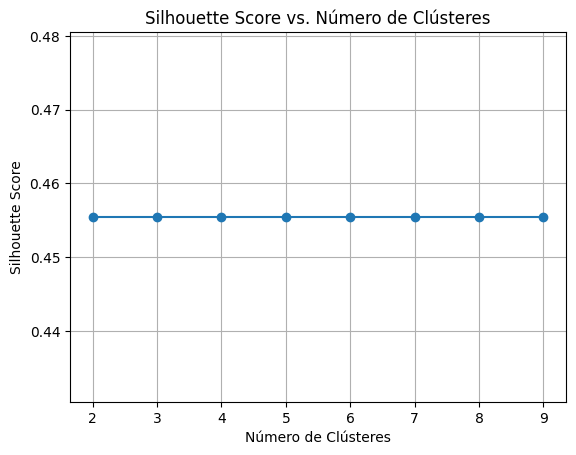

In [368]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import numpy as np

# Lista de números de clústeres a probar
n_clusters = range(2, 10)  # Por ejemplo, de 2 a 9 clústeres
silhouette_scores = []

for n in n_clusters:
    birch_model = Birch(n_clusters=n)
    labels = birch_model.fit_predict(pca_result)

    if len(set(labels)) > 1:  # Solo calcular el score si hay más de un clúster
        score = silhouette_score(pca_result, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)  # Si solo hay un clúster

# Gráfica de Silhouette Scores
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Número de Clústeres')
plt.xticks(n_clusters)
plt.grid()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (5). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Mejor combinación:
Threshold           0.200000
n_Clusters          2.000000
Silhouette_Score    0.507623
Name: 4, dtype: float64


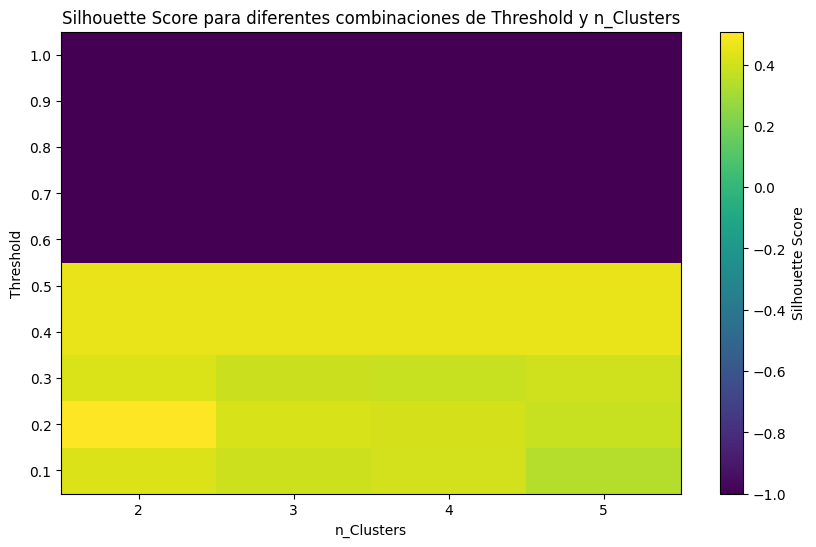

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

# Rango de thresholds y número de clusters a probar
thresholds = np.arange(0.1, 1.1, 0.1)  # Ajusta el rango según sea necesario
n_clusters_range = range(2, 6)  # Ajusta el rango según sea necesario

# Almacenar resultados
results = []

# Evaluar cada combinación de threshold y número de clusters
for t in thresholds:
    for n in n_clusters_range:
        # Crear y ajustar el modelo BIRCH
        birch_model = Birch(threshold=t, n_clusters=n)
        labels = birch_model.fit_predict(pca_result)

        # Asegurarse de que hay al menos 2 clusters
        if len(set(labels)) > 1:
            score = silhouette_score(pca_result, labels)
        else:
            score = -1  # Asignar un valor negativo si no hay suficiente información

        results.append((t, n, score))

# Convertir a DataFrame para facilitar el análisis
results_df = pd.DataFrame(results, columns=['Threshold', 'n_Clusters', 'Silhouette_Score'])

# Encontrar la mejor combinación
best_combination = results_df.loc[results_df['Silhouette_Score'].idxmax()]

print("Mejor combinación:")
print(best_combination)

# Visualizar resultados
pivot_table = results_df.pivot(index='Threshold', columns='n_Clusters', values='Silhouette_Score')
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Silhouette Score')
plt.xticks(ticks=np.arange(len(n_clusters_range)), labels=n_clusters_range)
plt.yticks(ticks=np.arange(len(thresholds)), labels=thresholds.round(2))
plt.xlabel('n_Clusters')
plt.ylabel('Threshold')
plt.title('Silhouette Score para diferentes combinaciones de Threshold y n_Clusters')
plt.show()

# **BIRCH**

In [385]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import Birch

# Aplicar BIRCH
birch_model = Birch(n_clusters=2,threshold=0.2)
birch_model.fit(pca_result)

# Obtener etiquetas de clúster
labels = birch_model.labels_

# Añadir etiquetas al DataFrame original si es necesario
df_tiendas['Cluster'] = labels

# **Visualización**

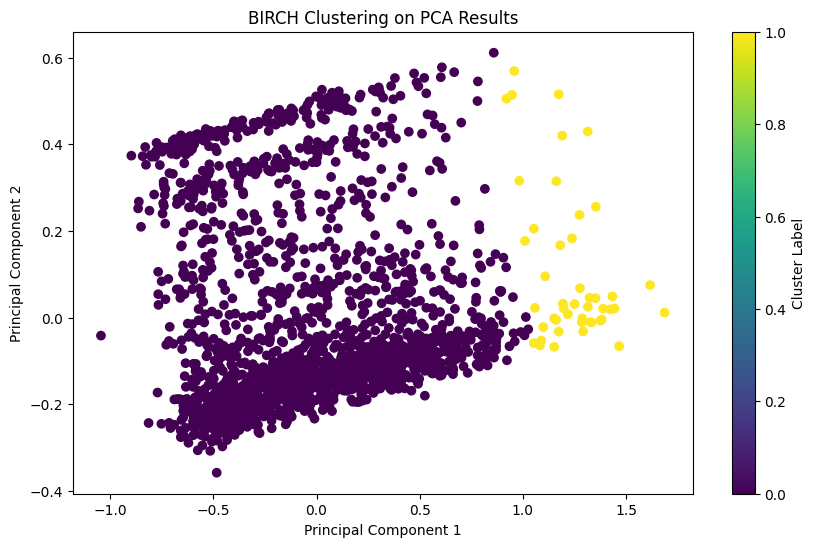

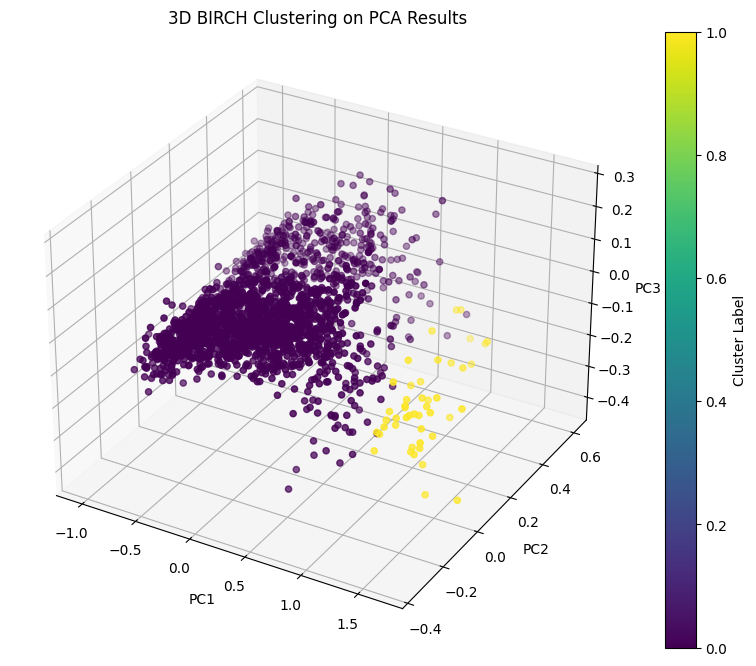

In [386]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2D Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('BIRCH Clustering on PCA Results')
plt.colorbar(scatter, label='Cluster Label')  # Agregar una barra de color asociada al scatter
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter_3d = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=labels, cmap='viridis', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D BIRCH Clustering on PCA Results')
plt.colorbar(scatter_3d, label='Cluster Label')  # Agregar una barra de color asociada al scatter 3D
plt.show()

In [387]:
df_tiendas['Cluster'].value_counts()

,count
Cluster,
0,1936
1,46


# **Métricas de evaluación**

SILHOUETTE SCORE

In [388]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_tiendas, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.31400532552772564
